# Wrangle WeRateDog Twitter Data

## Table of Contents
- [Part I - Gather](#gather)
- [Part II - Access](#access)
- [Part III - Clean](#clean)
- [Part IV - Analysis and Visulization](#analysis)

<a id='gather'></a>
## Gather
- Manually download `twitter-archive-enhanced.csv` file and upload to the same directory of `wrangle_act.ipynb`
- Download `image-predictions.tsv` file by `Requests` library
- Generate `tweet-extended.csv` file containing extra information (retweet_count and favourites_count) of each tweet in `twitter-archive-enhanced.csv` file using `tweepy` library

### Import Standard packages

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

### Download image-predictions.tsv files

In [330]:
###import third-party packages, if not exist, install it by `pip install tweepy`
import tweepy

In [ ]:
#twitter-archive-enhanced.csv has been uploaded to the notebook directory manually
#image-predictions.tsv is downloaded by `Requests` library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
filename = url.split('/')[-1]
with open(filename, mode='wb') as f:
    f.write(response.content)

### Generate tweet-extended.csv file

In [ ]:
#set up Twitter authentication and connect to Twitter's API
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#define a function to write tweets to a txt file
def get_tweet_text(idlist, filename):
    '''
    write content for a list of tweet IDs to a txt flie, one line per ID
    `idlist`: a list of tweet IDs
    `filename`: the name of txt file where text is stored
    '''
    f = open(filename, mode='w+')
    deleted_id_count = 0
    for tweet_id in idlist:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            f.write((json.dumps(tweet._json)) + '\n')
            print(tweet_id)
        except Exception as e:
            deleted_id_count += 1
            print("%d: %s" %(tweet_id, e))
        
    print('%d Tweet ID could not be found.' %(deleted_id_count))
    f.close()

In [ ]:
#generate the list of tweet ID from twitter-archive-enhanced.csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
idlist = twitter_archive.tweet_id

#write tweets content to tweet-json.txt
get_tweet_text(idlist, 'tweet-json.txt')

In [ ]:
#read each line in tweet-json.txt and extract id, retweet_count, favourites_count of each tweet
df_list = []
f = open('tweet-json.txt', 'r')
for x in f:
    dic = json.loads(x)
    tweet_id = dic['id']
    retweet_count = dic['retweet_count']
    fav_count = dic['favorite_count']
    
    df_list.append({'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': fav_count})

f.close()

#convert it to Panda DataFrame and save it to csv file
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df.to_csv('tweet-extended.csv', index=False)

<a id='access'></a>
## Access

In [5]:
extended = pd.read_csv('tweet-extended.csv')
archive = pd.read_csv('twitter-archive-enhanced.csv')
image = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
print(extended.shape, archive.shape, image.shape)

(2337, 3) (2356, 17) (2075, 12)


<span style="color:blue">*Some tweets are missing in `extended` and `image` table.*

In [7]:
#column information
print(list(extended))
print(list(archive))
print(list(image))

['tweet_id', 'retweet_count', 'favorite_count']
['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


### Access table `extended` 

In [8]:
#overveiw of the table
extended.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8188,37530
1,892177421306343426,6057,32256
2,891815181378084864,4007,24301
3,891689557279858688,8339,40869
4,891327558926688256,9033,39065


In [9]:
#Any null value?
extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [10]:
#any value is out of expect?
extended.describe()

,tweet_id,retweet_count,favorite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.420692e+17,2876.821138,7841.225075
std,6.824243e+16,4859.790100,12153.273610
min,6.660209e+17,1.000000,0.000000
25%,6.783345e+17,580.000000,1363.000000
50%,7.185406e+17,1344.000000,3421.000000
75%,7.986825e+17,3355.000000,9606.000000
max,8.924206e+17,82426.000000,162077.000000


In [11]:
#any duplicated value?
extended.tweet_id.duplicated().sum()

0

### Access table `archive`

In [12]:
#overview of the table
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
#Any duplicated value?
archive.tweet_id.duplicated().sum()

0

In [14]:
#Any null value? appropriate data type?
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- <span style="color:blue">*`archive` table contains 181 retweets.*</span>
- <span style="color:blue">*columns related to retweets are not necessary in the table: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp*</span>
- <span style="color:blue">*column in_reply_to_status_id, in_reply_to_user_id are also irrelevant*</span>
- <span style="color:blue">*timestamp should be in datetime format*</span>
- <span style="color:blue">*doggo, floofer, pupper, and puppo should be in one categorical column*</span>

In [15]:
#Any unexpected value?
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
archive[archive.rating_denominator != 10].tweet_id.count()

23

<span style="color:blue">*The denominator for most rows is 10. There are 23 rows whose denominator is not 10.*</span>

In [17]:
archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [18]:
archive[archive.rating_numerator > 20].rating_numerator.count()

24

In [19]:
archive[archive.rating_numerator < 3].rating_numerator.count()

20

<span style="color:blue">*Some rows contain very high or very low numerators.*</span>

In [20]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

<span style="color:blue">*Some rows may contain two stages information.*</span>

### access Table `image_predictions`

In [24]:
#Overview of the table
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2037,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,Labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
1371,762316489655476224,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,African_grey,0.270468,False,Madagascar_cat,0.076187,False,television,0.033306,False
1949,863062471531167744,https://pbs.twimg.com/media/C_o2vKCUwAAgtOp.jpg,2,French_bulldog,0.935804,True,pug,0.059576,True,boxer,0.001412,True


In [25]:
#Any null value?
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
#Any unexpected value?
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<span style="color:blue">*An extra column is needed to contain the final prediction result.*</span>

### Quality
- Some tweets are missing in `extended` and `image` table.
- `archive` table contains 181 retweets.
- Columns related to retweets are not necessary in the table: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- column in_reply_to_status_id, in_reply_to_user_id are also irrelevant
- Timestamp should be in datetime format
- The denominator is not 10 for 23 rows.
- Some rows contain very high or very low numerators.
- Some rows may contain 2 different stages.
- One more column in `image` table is needed to contain the prediction result for each tweet.

### Tidiness
- Doggo, floofer, pupper, and puppo should be in one categorical column
- `extended` and `tweet` table should be combined as they describe one observation (tweet).

<a id='clean'></a>
## Clean

In [27]:
archive_clean = archive.copy()
extended_clean = extended.copy()
image_clean = image.copy()

### Missing and Irrelevant Data

#### Define
remove retweets: rows with 'retweeted_status_id' value
#### Code

In [28]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

##### Test

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define
- Drop columns related to retweets: *retweeted_status_id*, *retweeted_status_user_id* and *retweeted_status_timestamp*
- Drop unnessary columns: *in_reply_to_status_id* and *in_reply_to_user_id*

#### Code

In [30]:
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

##### Test

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define
Combine three tables together to get the common rows
#### Code

In [32]:
from functools import reduce
dfs = [archive_clean, extended_clean, image_clean]
combined_df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), dfs)

#### Test

In [33]:
print(combined_df.shape)
all_columns = set((list(archive_clean) + list(extended_clean) + list(image_clean)))
sorted(all_columns) == sorted(set(combined_df))

(1990, 25)


True

### Tidiness
#### Define
Split the combined table to two tables: one using tweet as observation unit, the other using image as observation unit
#### Code

In [34]:
tweet_clean = combined_df[['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count']]

In [35]:
image_clean = combined_df[['tweet_id','jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']]

#### Test

In [36]:
print(tweet_clean.shape)
tweet_clean.sample(5)

(1990, 14)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1771,670086499208155136,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",https://twitter.com/dog_rates/status/670086499...,10,10,None,None,None,None,None,254,698
1505,675497103322386432,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,https://twitter.com/dog_rates/status/675497103...,11,10,Reggie,None,None,None,None,1342,3185
446,796080075804475393,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,https://twitter.com/dog_rates/status/796080075...,12,10,Yogi,None,None,None,None,2505,8965
166,850753642995093505,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,None,None,None,None,9561,31481
1578,673956914389192708,2015-12-07 20:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None,979,1957


In [37]:
print(image_clean.shape)
image_clean.head()

(1990, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define 
- check if any dog has two stages
- convert *doggo*, *floofer*, *pupper*, *puppo*, *none* to one column and then change the column type to category

#### Code

In [38]:
tweet_clean['doggo'] = tweet_clean.doggo.replace('doggo', 1)
tweet_clean['doggo'] = tweet_clean.doggo.replace('None', 0)

tweet_clean['floofer'] = tweet_clean.floofer.replace('floofer', 1)
tweet_clean['floofer'] = tweet_clean.floofer.replace('None', 0)

tweet_clean['pupper'] = tweet_clean.pupper.replace('pupper', 1)
tweet_clean['pupper'] = tweet_clean.pupper.replace('None', 0)

tweet_clean['puppo'] = tweet_clean.puppo.replace('puppo', 1)
tweet_clean['puppo'] = tweet_clean.puppo.replace('None', 0)

#create a new column for rows without stage information
tweet_clean['none'] = 1 - tweet_clean.doggo - tweet_clean.floofer - tweet_clean.pupper - tweet_clean.puppo

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [39]:
tweet_clean[tweet_clean.none < 0].tweet_id.count()

11

<span style="color:blue">*11 rows contain more than one stage information. Remove those rows.*</span>

In [40]:
#Remove those rows
tweet_clean = tweet_clean[tweet_clean.none >= 0]

In [41]:
#convert doggo, floofer, pupper, puppo, none to one column
stages = ['doggo', 'floofer', 'pupper', 'puppo', 'none']
ids = [x for x in list(tweet_clean) if x not in stages]
tweet_clean = pd.melt(tweet_clean, id_vars=ids, value_vars=stages, var_name='stage')
tweet_clean = tweet_clean[tweet_clean.value == 1]
tweet_clean.drop('value', axis=1, inplace=True)

In [42]:
#convert the stage column to category data type
tweet_clean.stage = tweet_clean.stage.astype('category')

#### Test

In [43]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 9 to 9894
Data columns (total 11 columns):
tweet_id              1979 non-null int64
timestamp             1979 non-null object
source                1979 non-null object
text                  1979 non-null object
expanded_urls         1979 non-null object
rating_numerator      1979 non-null int64
rating_denominator    1979 non-null int64
name                  1979 non-null object
retweet_count         1979 non-null int64
favorite_count        1979 non-null int64
stage                 1979 non-null category
dtypes: category(1), int64(5), object(5)
memory usage: 172.2+ KB


In [44]:
tweet_clean.stage.value_counts()

none       1684
pupper      203
doggo        63
puppo        22
floofer       7
Name: stage, dtype: int64

#### Define
convert the *timestamp* column to datetime

#### Code

In [45]:
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp)

#### Test

In [46]:
tweet_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
retweet_count                  int64
favorite_count                 int64
stage                       category
dtype: object

#### Define
investigate 23 rows whose denominator is not 10

#### Code

In [47]:
#show text of rows with non-10 denominators
for i in tweet_clean[tweet_clean.rating_denominator != 10].text:
    print(i)
    print('\n')

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1


Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co

In [48]:
#remove rows which don't contain /10 and set all others to 10
contain_ten = tweet_clean.text.str.contains('/10')
tweet_clean = tweet_clean[contain_ten]
to_repair = (tweet_clean[tweet_clean.rating_denominator != 10].text.index)
for index in to_repair:
    tweet_clean.at[index, 'rating_denominator'] = 10

#### Test

In [49]:
tweet_clean[tweet_clean.rating_denominator != 10].tweet_id.count()

0

#### Define
investigate rows with high or low numerator

#### Code

In [50]:
tweet_clean.rating_numerator.value_counts()

12      444
10      417
11      394
13      257
9       151
8        95
7        52
14       35
6        32
5        32
3        19
4        16
2         9
1         5
0         2
420       1
26        1
27        1
50        1
75        1
1776      1
Name: rating_numerator, dtype: int64

In [51]:
#check if the number before '/10' matches with rating_numerator
cannot_parse = set()
incorrect = set()

for i in tweet_clean.index:
    index = tweet_clean.loc[i].text.find('/10')
    try:
        numerator = int(tweet_clean.loc[i].text[index-2:index].strip())
    except:
        cannot_parse.add(i)
        continue
    if numerator != tweet_clean.loc[i].rating_numerator:
        incorrect.add(i)

print("# rows that cannot be parsed: " + str(len(cannot_parse)))
print("# rows whose parsed numerator doesn't match with existing one: " + str(len(incorrect))) 

# rows that cannot be parsed: 7
# rows whose parsed numerator doesn't match with existing one: 7


In [52]:
#investigate the incorrect rows manually
for i in incorrect:
    print(str(i) + ":" + str(tweet_clean.loc[i].text))
    print(str(tweet_clean.loc[i].rating_numerator))
    print('\n')

9230:This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
7


9874:This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
1


9619:After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
420


8630:This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1776


8793:Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
4


8827:This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
50


8703:After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
9




In [53]:
#correct the incorrect numerator except 9619(420) and 8630(1776)
for i in incorrect:
    if i != 9619 and i!= 8630:
        index = tweet_clean.loc[i].text.find('/10')
        tweet_clean.at[i, 'rating_numerator'] = int(tweet_clean.loc[i].text[index-2:index].strip())

In [54]:
#investigate the cannot_parse rows manually
for i in cannot_parse:
    print(str(i) + ":" + str(tweet_clean.loc[i].text))
    print(str(tweet_clean.loc[i].rating_numerator))
    print('\n')

9034:Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.
...8/10 https://t.co/iAeQNueou8
8


8975:I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY
9


5263:"Hello forest pupper I am house pupper welcome to my abode" (8/10 for both) https://t.co/qFD8217fUT
8


7955:This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
5


8666:This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt
9


9788:This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN
2


9183:For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG
9




In [55]:
#correct row#7955                                                  
tweet_clean.at[7955,'rating_numerator'] = 14                                                

#### Test

In [56]:
for i in incorrect.union(cannot_parse):
    print(str(i) + ":" + str(tweet_clean.loc[i].text))
    print("numerator: " + str(tweet_clean.loc[i].rating_numerator))
    print('\n')

9034:Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.
...8/10 https://t.co/iAeQNueou8
numerator: 8


9183:For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG
numerator: 9


9230:This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
numerator: 10


8975:I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY
numerator: 9


5263:"Hello forest pupper I am house pupper welcome to my abode" (8/10 for both) https://t.co/qFD8217fUT
numerator: 8


9874:This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
numerator: 9


9619:After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
numerator: 420


7955:This is Bella. She hope

#### Define
- delete the tweet_id which exist in `image_clean` table but not in `tweet_clean` table

#### Code

In [57]:
common_id = image_clean.tweet_id.isin(tweet_clean.tweet_id)
image_clean = image_clean[common_id]

#### Test

In [59]:
id1 = image_clean.tweet_id.sort_values()
id2 = tweet_clean.tweet_id.sort_values()
list(id1) == list(id2)

True

#### Define
The `image` table contains top 3 prediction about the dog breed given by neural network. I will use the prediction result which is a dog breed and has highest confidence as the result of prediction for each tweet.
- create a new column `prediction` and the value is the most likely prediction results
- create a new column `breed` and make the value the same as `prediction` value for top 10 dog breeds and not_dog; change others to other_dog
- change the `breed` column to category

#### Code

In [60]:
#generate prediction column
image_clean['prediction'] = 'not_dog'

first = image_clean.p1_dog == True
image_clean.loc[first,'prediction'] = image_clean.loc[first,'p1']

second = (image_clean.p1_dog == False) & (image_clean.p2_dog == True)
image_clean.loc[second,'prediction'] = image_clean.loc[second,'p2']

third = (image_clean.p1_dog == False) & (image_clean.p2_dog == False) & (image_clean.p3_dog == True)
image_clean.loc[third,'prediction'] = image_clean.loc[third,'p3']

In [61]:
image_clean.prediction.value_counts()

not_dog                           306
golden_retriever                  151
Labrador_retriever                102
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               47
Pomeranian                         42
Samoyed                            41
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
Staffordshire_bullterrier          21
German_shepherd                    21
Shih-Tzu                           20
Siberian_husky                     20
beagle                             20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
Lakeland_terrier                   18
kuvasz      

In [62]:
#get the first 10 most tweeted dog breeds
top10_breed = list(image_clean.prediction.value_counts()[:11].index)

#create breed column
image_clean['breed'] = image_clean['prediction']
is_top10_breed = image_clean.breed.isin(top10_breed)
image_clean.loc[~is_top10_breed, 'breed'] = 'other_dog'

#set the breed column to category
image_clean.breed = image_clean.breed.astype('category')

#### Test

In [63]:
image_clean.dtypes

tweet_id         int64
jpg_url         object
img_num          int64
p1              object
p1_conf        float64
p1_dog            bool
p2              object
p2_conf        float64
p2_dog            bool
p3              object
p3_conf        float64
p3_dog            bool
prediction      object
breed         category
dtype: object

In [64]:
print(len(image_clean.breed.value_counts()))
image_clean.breed.value_counts()

12


other_dog             945
not_dog               306
golden_retriever      151
Labrador_retriever    102
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   47
Pomeranian             42
Samoyed                41
malamute               33
Name: breed, dtype: int64

#### Define
Final clean up (reset index) and check (same tweet_id in two tables)
#### Code

In [65]:
tweet_clean.reset_index(drop=True, inplace=True)
image_clean.reset_index(drop=True, inplace=True)

#### Test

In [66]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 11 columns):
tweet_id              1966 non-null int64
timestamp             1966 non-null datetime64[ns]
source                1966 non-null object
text                  1966 non-null object
expanded_urls         1966 non-null object
rating_numerator      1966 non-null int64
rating_denominator    1966 non-null int64
name                  1966 non-null object
retweet_count         1966 non-null int64
favorite_count        1966 non-null int64
stage                 1966 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 155.8+ KB


In [427]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 14 columns):
tweet_id      1966 non-null int64
jpg_url       1966 non-null object
img_num       1966 non-null int64
p1            1966 non-null object
p1_conf       1966 non-null float64
p1_dog        1966 non-null bool
p2            1966 non-null object
p2_conf       1966 non-null float64
p2_dog        1966 non-null bool
p3            1966 non-null object
p3_conf       1966 non-null float64
p3_dog        1966 non-null bool
prediction    1966 non-null object
breed         1966 non-null category
dtypes: bool(3), category(1), float64(3), int64(2), object(5)
memory usage: 161.8+ KB


In [67]:
sorted(list(tweet_clean.tweet_id)) == sorted(list(image_clean.tweet_id))  

True

### Store the cleaned files

In [68]:
tweet_clean.to_csv('tweet_clean.csv')
image_clean.to_csv('image_clean.csv')

In [69]:
twitter_archive_master = pd.merge(tweet_clean, image_clean, on = 'tweet_id')
twitter_archive_master.to_csv('')

<a id='analysis'></a>
## Analysis and Visualization

### Functions

In [72]:
tweet_clean.timestamp.min(), tweet_clean.timestamp.max()

(Timestamp('2015-11-15 22:32:08'), Timestamp('2017-08-01 16:23:56'))

In [73]:
def favorite_over_time():
    df = tweet_clean.copy()
    q = df.favorite_count.quantile([0.05, 0.95])
    df = df.drop(df[df.favorite_count < q[0.05]].index)
    df = df.drop(df[df.favorite_count > q[0.95]].index)
    
    x = df.timestamp.dt.dayofyear + (df.timestamp.dt.year - 2015)*365-319
    y = df.favorite_count
    
    plt.scatter(x,y);
    plt.xlabel('Days Since First Tweet');
    plt.ylabel('Favorite Count of Each Tweet')
    plt.title('Favorite Count of Tweet Over Time')

    z = np.polyfit(x,y,1)
    f = np.poly1d(z)
    plt.plot(x, f(x), 'r-');
    equation = "favorite = %.0f * days + %.0f"%(z[0], z[1])

    plt.text(660, 20000, equation, fontsize=12, color='red')

In [74]:
def retweet_over_time():
    df = tweet_clean.copy()
    q = df.retweet_count.quantile([0.05, 0.95])
    df = df.drop(df[df.retweet_count < q[0.05]].index)
    df = df.drop(df[df.retweet_count > q[0.95]].index)
    
    x = df.timestamp.dt.dayofyear + (df.timestamp.dt.year - 2015)*365 - 319
    y = df.retweet_count
    
    plt.scatter(x, y);
    plt.xlabel('Days Since First Tweet')
    plt.ylabel('Retweet Count of Each Tweet')
    plt.title('Retweet Count Over Time')
    
    z = np.polyfit(x, y, 1)
    f = np.poly1d(z)
    plt.plot(x, f(x), 'r--');
    equation = "retweet = %.0f * days + %.0f"%(z[0], z[1])
    
    plt.text(660, 4200, equation, fontsize=12, color='red')   

In [75]:
def most_tweeted_breed():
    df = image_clean.copy()
    df = df.drop(df[df['breed'] == "not_dog"].index)
    df = df.drop(df[df['breed'] == "other_dog"].index)
    breed = df.breed.cat.remove_unused_categories().value_counts().sort_values()

    x = breed.index
    y = breed.values
    
    label = []
    for item in x:
        label.append(item.replace('_', ' '))

    plt.bar(range(len(x)), y);
    plt.xticks(range(len(x)), label, rotation=90);

    plt.title('Most Tweet Dog Breeds')
    plt.ylabel('Tweet Count')

In [76]:
def image_with_rating_table():
    df = pd.merge(image_clean[['tweet_id', 'breed']], 
                                     tweet_clean[['tweet_id', 'rating_numerator', 'favorite_count', 'retweet_count']],
                                     on = 'tweet_id') 
    df = df.drop(df[df.breed == 'other_dog'].index)
    df = df.drop(df[df.breed == 'not_dog'].index)
    df.breed.cat.remove_unused_categories(inplace=True)
    return df

In [77]:
def breed_rating():
    df = image_with_rating_table()
    rating = df.groupby('breed').mean()['rating_numerator'].sort_values()
    x = rating.index
    y = rating.values

    label = []
    for item in x:
        label.append(item.replace('_', ' '))

    plt.bar(range(len(x)), y);
    plt.xticks(range(len(x)), label, rotation=90);
    plt.title('Top 10 Highly Rated Dog Breed')
    plt.ylabel('Rating')

In [78]:
def breed_favorite():     
    df = image_with_rating_table()
    rating = df.groupby('breed').mean()['favorite_count'].sort_values()
    x = rating.index
    y = rating.values

    label = []
    for item in x:
        label.append(item.replace('_', ' '))

    plt.bar(range(len(x)), y);
    plt.xticks(range(len(x)), label, rotation=90);
    plt.title('Top 10 Most Liked Dog Breeds')
    plt.ylabel('Favorite Count ')

In [79]:
def breed_retweet():     
    df = image_with_rating_table()
    rating = df.groupby('breed').mean()['retweet_count'].sort_values()
    x = rating.index
    y = rating.values

    label = []
    for item in x:
        label.append(item.replace('_', ' '))

    plt.bar(range(len(x)), y);
    plt.xticks(range(len(x)), label, rotation=90);
    plt.title('Top 10 Most Retweeted Dog Breeds')
    plt.ylabel('Retweet Count ')

### Visualization

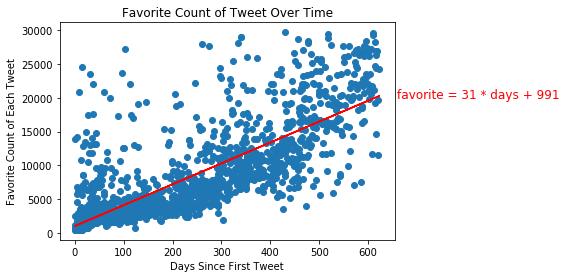

In [80]:
favorite_over_time()

<span style='color:blue'> *From the first tweet (2015-11-15) to the last one (2017-08-01), the number of likes that each tweet has increased as a rate of 31 per day.*  </span>

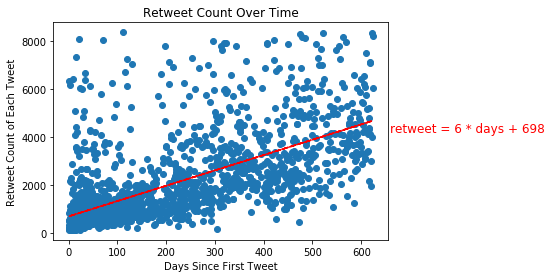

In [81]:
retweet_over_time()

<span style='color:blue'> *From the first tweet (2015-11-15) to the last one (2017-08-01), the number of retweet that each tweet has increased as a rate of 6 per day.*  </span>

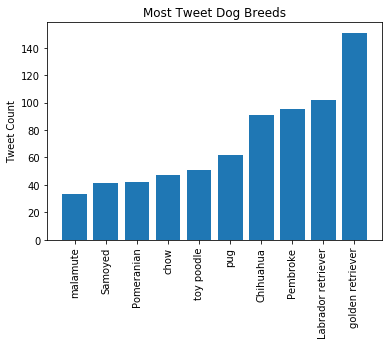

In [82]:
most_tweeted_breed()

<span style='color:blue'> *The top ten most mentioned dog in the tweets are golden retriever, labrador retriever, pembroke, chihuahua, pug, toy poodle, chow, pomeranian, Samoyed, malamute (the time that has been mentioned from high to low).*  </span>

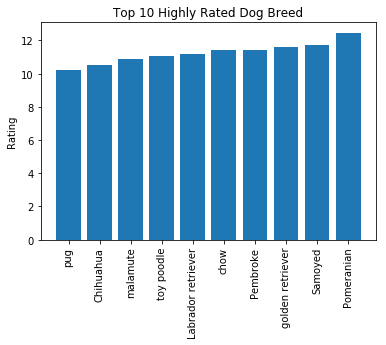

In [83]:
breed_rating()

<span style='color:blue'> *Pomeranian, samoyed, golden retriever are the most highly rated dog breed.*  </span>

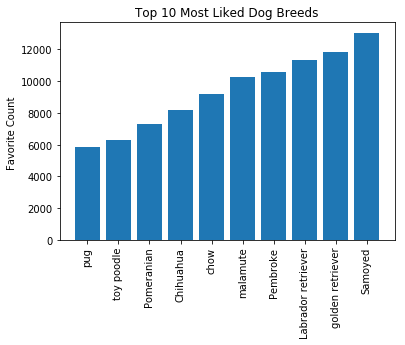

In [84]:
breed_favorite()

<span style='color:blue'> *Samoyed, goldern retriever and labrador retriever are the most liked dog breed.*  </span>

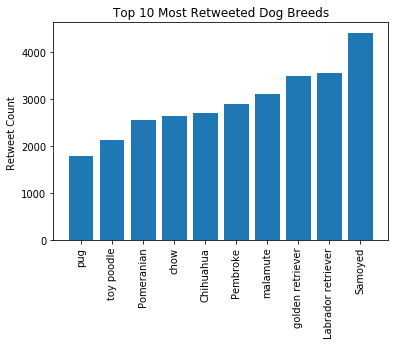

In [85]:
breed_retweet()

<span style='color:blue'> *Samoyed, labrador retriever, goldern retriever are the most retweeted dog breeds.* </span>